## import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

## Explore the dataset

In [2]:
file_path = "CrabAgePrediction.csv"
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [4]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


## Checkout for null datapoints/duplicates

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Data Visualization

In [7]:
num = df.select_dtypes('number')
z = num.corr()
z.head(3)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
Height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956


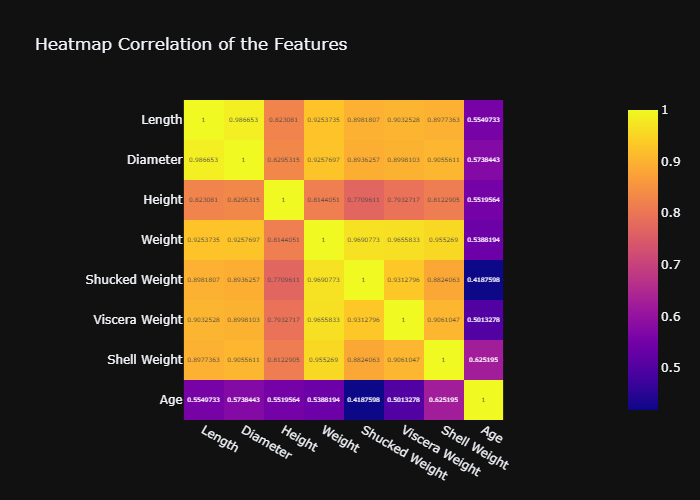

In [8]:
fig = px.imshow(z, text_auto=True, template='plotly_dark', title='Heatmap Correlation of the Features')
fig.show(renderer='png')

In [9]:
df2 = df.groupby('Sex')['Weight'].mean().reset_index()
df2

,Sex,Weight
0,F,29.663852
1,I,12.240811
2,M,28.094957


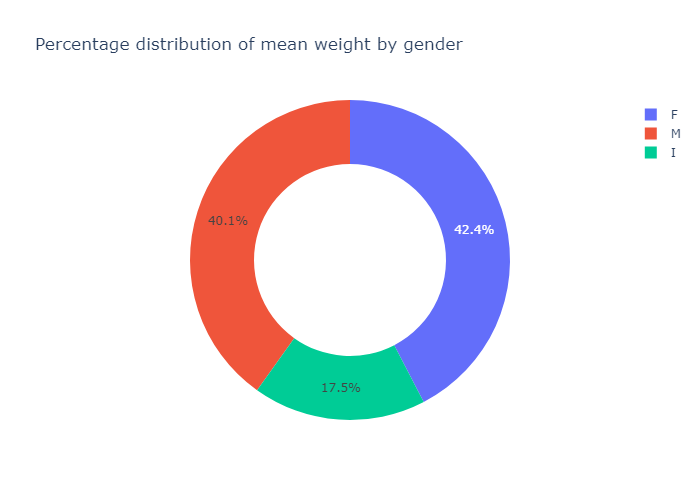

In [10]:
fig = px.pie(df2, names='Sex', values='Weight', hole=0.6, title='Percentage distribution of mean weight by gender')
fig.show(renderer='png')

In [11]:
df2 = df.groupby('Sex')['Weight'].max().reset_index()
df2

,Sex,Weight
0,F,75.324622
1,I,58.102300
2,M,80.101512


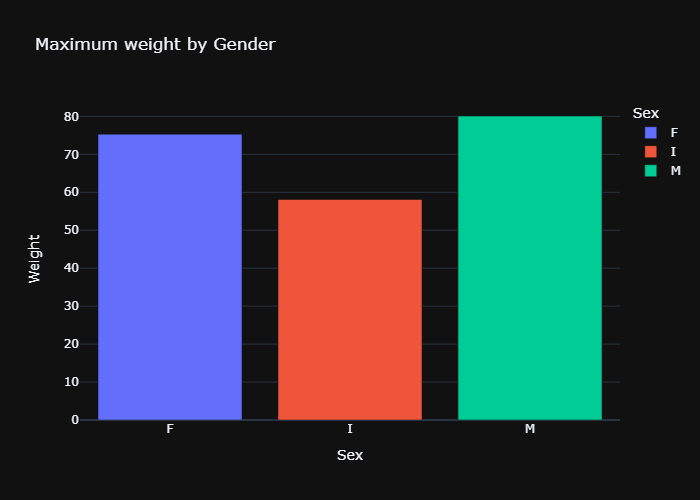

In [12]:
fig = px.bar(df2, x='Sex', y='Weight', color='Sex', template='plotly_dark', title='Maximum weight by Gender')
fig.show(renderer='png')

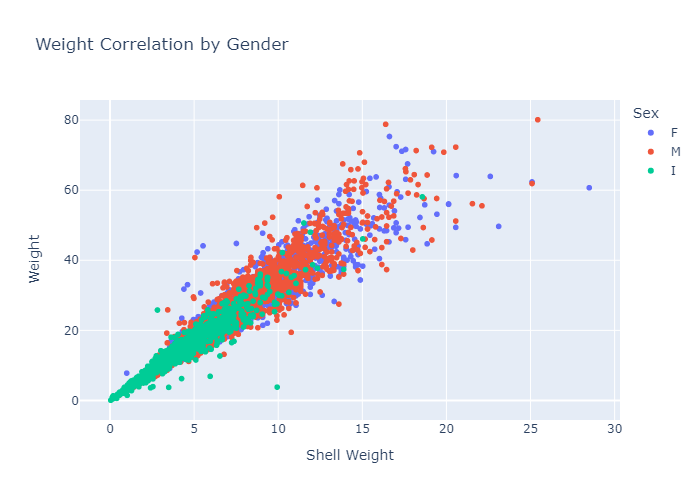

In [13]:
fig = px.scatter(df, x='Shell Weight', y='Weight', color='Sex', title='Weight Correlation by Gender', hover_data='Age')
fig.show(renderer='png')

In [14]:
df2 = df.groupby('Age')['Height'].mean().reset_index().head(500)
df2.head(3)

,Age,Height
0,1,0.025000
1,2,0.062500
2,3,0.104808


In [15]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

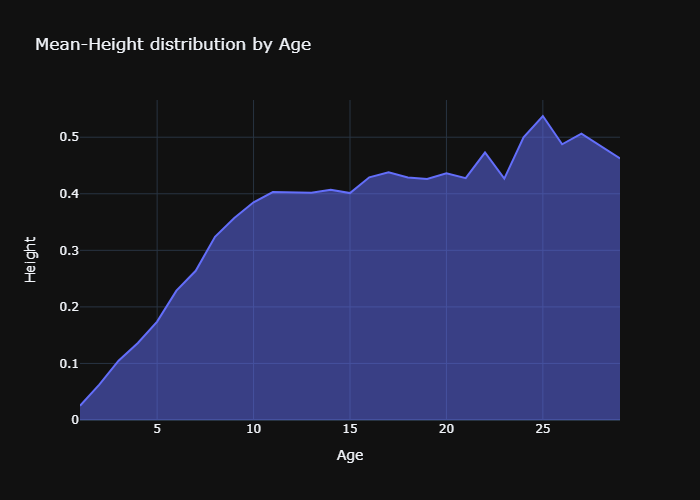

In [16]:
fig = px.area(df2, x='Age', y='Height', template='plotly_dark', title='Mean-Height distribution by Age')
fig.show(renderer='png')

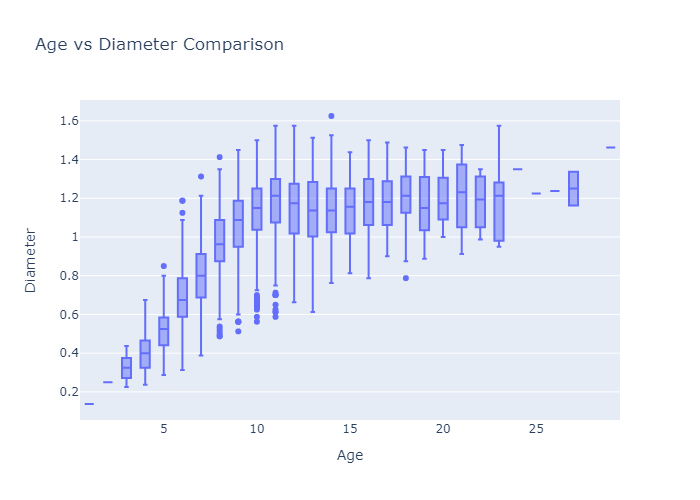

In [17]:
fig = px.box(df, x='Age', y='Diameter', title='Age vs Diameter Comparison')
fig.show(renderer='png')


In [18]:
df2 = df['Age'].value_counts().head(10).reset_index()
df2.head(3)

,Age,count
0,9,640
1,10,598
2,8,520


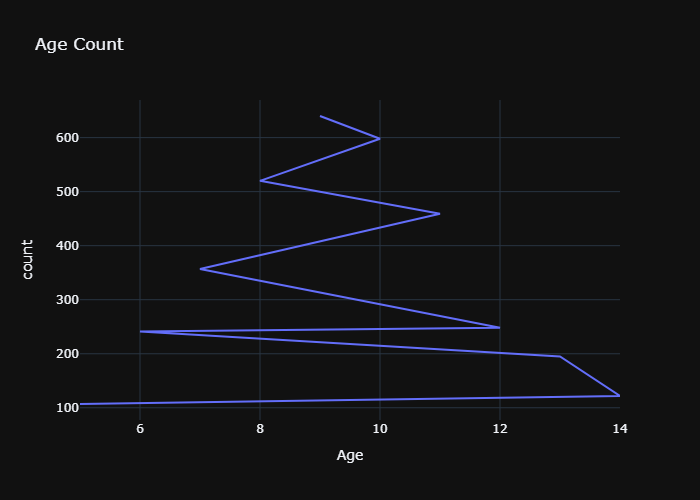

In [19]:
fig = px.line(df2, x='Age', y='count', title='Age Count', template='plotly_dark')
fig.show(renderer='png')

In [20]:
df.head(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.175,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.650,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.775,0.2500,7.952035,3.231843,1.601747,2.764076,6


## Drop redundant features

In [21]:
drop_features = ['Shucked Weight', 'Viscera Weight']
df = df.drop(drop_features, axis=1)
df.tail(2)

,Sex,Length,Diameter,Height,Weight,Shell Weight,Age
3891,I,1.0625,0.7750,0.2625,10.347568,2.976698,6
3892,I,0.7875,0.6125,0.2125,4.068153,1.417475,8


## Convert categorical feature to numeric

In [23]:
from sklearn.preprocessing import OneHotEncoder
# generate the dummies
new_df = pd.get_dummies(df['Sex'])
# convert booleans to integer
new_df = new_df.astype('int')
# drop the categorical column
df = df.drop('Sex', axis=1)
# join the dataframe
df = df.join(new_df)
# display the first five rows
df.head()

,Length,Diameter,Height,Weight,Shell Weight,Age,F,I,M
0,1.4375,1.1750,0.4125,24.635715,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,1.700970,6,0,1,0


## Check for outliers

In [24]:
df.describe()

,Length,Diameter,Height,Weight,Shell Weight,Age,F,I,M
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.00000
mean,1.311306,1.020893,0.349374,23.567275,6.795844,9.954791,0.314667,0.316722,0.36861
std,0.300431,0.248233,0.104976,13.891201,3.943392,3.220967,0.464443,0.465258,0.48249
min,0.187500,0.137500,0.000000,0.056699,0.042524,1.000000,0.000000,0.000000,0.00000
25%,1.125000,0.875000,0.287500,12.672227,3.713785,8.000000,0.000000,0.000000,0.00000
50%,1.362500,1.062500,0.362500,22.792998,6.662133,10.000000,0.000000,0.000000,0.00000
75%,1.537500,1.200000,0.412500,32.786197,9.355335,11.000000,1.000000,1.000000,1.00000
max,2.037500,1.625000,2.825000,80.101512,28.491248,29.000000,1.000000,1.000000,1.00000


In [25]:
px.box(df, y='Weight', template='plotly_dark')

In [26]:
df.shape

(3893, 9)

## Get rid of outliers using InterQuatile Range

In [27]:
filter_columns = ['Length', 'Diameter', 'Height', 'Weight', 'Shell Weight']

for column in filter_columns:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3-Q1
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR 

    df = df[(df[column] <= upperbound) & (df[column] >= lowerbound)]
    
df.shape

(3775, 9)

In [28]:
px.box(df, y='Weight', template='plotly_dark')

## Reorder the feature columns

In [29]:
df.head(2)

,Length,Diameter,Height,Weight,Shell Weight,Age,F,I,M
0,1.4375,1.175,0.4125,24.635715,6.747181,9,1,0,0
1,0.8875,0.650,0.2125,5.400580,1.559222,6,0,0,1


In [30]:
new_order = ['Length', 'Diameter', 'Height', 'Shell Weight', 'Weight', 'F', 'I', 'M', 'Age']
df = df.reindex(columns=new_order)
df.head()

,Length,Diameter,Height,Shell Weight,Weight,F,I,M,Age
0,1.4375,1.1750,0.4125,6.747181,24.635715,1,0,0,9
1,0.8875,0.6500,0.2125,1.559222,5.400580,0,0,1,6
2,1.0375,0.7750,0.2500,2.764076,7.952035,0,1,0,6
3,1.1750,0.8875,0.2500,5.244657,13.480187,1,0,0,10
4,0.8875,0.6625,0.2125,1.700970,6.903103,0,1,0,6


In [31]:
# convert the data from float to integer
# df = df.astype(int)
# df.head()

## Split the features into input(X) and target(y)

In [32]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

## Normalize the input variables

In [33]:
from sklearn.preprocessing import RobustScaler, StandardScaler
# make an instance of the scalar
robust_scale = RobustScaler()
X = robust_scale.fit_transform(X)
X

array([[ 0.1875    ,  0.34615385,  0.4       , ...,  1.        ,
         0.        ,  0.        ],
       [-1.1875    , -1.26923077, -1.2       , ...,  0.        ,
         0.        ,  1.        ],
       [-0.8125    , -0.88461538, -0.9       , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.84375   , -1.84615385, -1.6       , ...,  0.        ,
         1.        ,  0.        ],
       [-0.75      , -0.88461538, -0.8       , ...,  0.        ,
         1.        ,  0.        ],
       [-1.4375    , -1.38461538, -1.2       , ...,  0.        ,
         1.        ,  0.        ]])

## Split the dataset into training/testing set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model using xgboost

In [35]:
import xgboost as xgb
from xgboost import XGBRegressor

In [36]:
model2 = xgb.XGBRegressor(eval_metrics='mean_absolute_error', learning_rate=0.1)

## Fit the model for training

In [37]:
model2.fit(X_train, y_train)

[03:28:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "eval_metrics" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             eval_metrics='mean_absolute_error', feature_types=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

## Make some prediction

In [38]:
y_pred = model2.predict(X_test)

## Evaluate the model

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.7532408619558575

In [41]:
model2.predict([[1,0,0,4,14,0,1,0]])

array([14.639748], dtype=float32)

## Save the model

In [42]:
import joblib as joblib
from joblib import dump, load

In [43]:
model = joblib.dump(model2, 'age_count.joblib')